In [1]:
import xarray as xr	
import pandas as pd

filenames = pd.read_csv('~/MasterArbeit/filenames.csv')

In [2]:
file = '/projekt_agmwend/home_rad/Joshua/HALO-AC3_VELOX_sea_ice/2022-04-01.zarr_v_0.1'

In [3]:
ds = xr.open_zarr(file, chunks={'time': 100, 'x': 250, 'y': 250})
#ds = ds.persist()   

/home/jomueller/.conda/envs/jomueller_env/lib/python3.9/site-packages/xarray/backends/plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
cannot import name 'NDArray' from 'numpy.typing' (/home/jomueller/.conda/envs/jomueller_env/lib/python3.9/site-packages/numpy/typing/__init__.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/jomueller/.conda/envs/jomueller_env/lib/python3.9/site-packages/xarray/core/dataset.py:410: UserWarning: Specified Dask chunks (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 23) would separate on disks chunk shape 250 for dimension ti

In [10]:
for var in ds.data_vars:
    print(var)
    print(ds[var].encoding)

BT_2D
{'chunks': (5, 250, 100, 100), 'preferred_chunks': {'band': 5, 'time': 250, 'x': 100, 'y': 100}, 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0), 'filters': None, '_FillValue': nan, 'dtype': dtype('float32')}
BT_Center
{'chunks': (5, 250), 'preferred_chunks': {'band': 5, 'time': 250}, 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0), 'filters': None, '_FillValue': nan, 'dtype': dtype('float32')}
alt
{'chunks': (5, 250), 'preferred_chunks': {'band': 5, 'time': 250}, 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0), 'filters': None, '_FillValue': nan, 'dtype': dtype('float32')}
lat
{'chunks': (5, 250), 'preferred_chunks': {'band': 5, 'time': 250}, 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0), 'filters': None, '_FillValue': nan, 'dtype': dtype('float32')}
lon
{'chunks': (5, 250), 'preferred_chunks': {'band': 5, 'time': 250}, 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE,

In [13]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(local_directory='/projekt_agmwend/home_rad/Joshua/dask-worker-space', memory_limit='20GB', n_workers=16, threads_per_worker=1)
client = Client(cluster)

client.close()

/home/jomueller/.conda/envs/jomueller_env/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39465 instead
  warnings.warn(


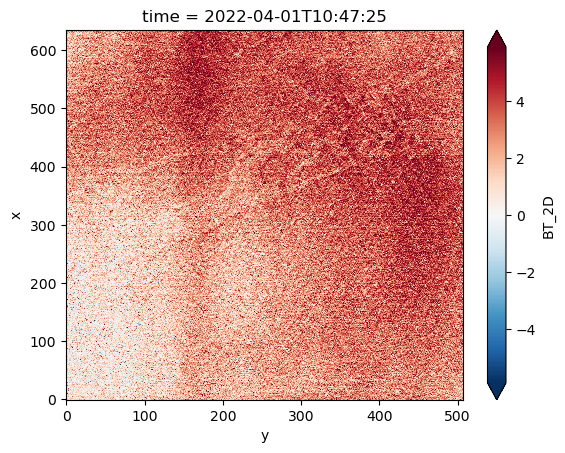

In [17]:
(ds.BT_2D.isel(time=4000, band=4) - ds.BT_2D.isel(time=4000, band=3)).plot(robust=True)
#ds.BT_2D.isel(time=4000, band=0).plot(robust=True)
ds.close()

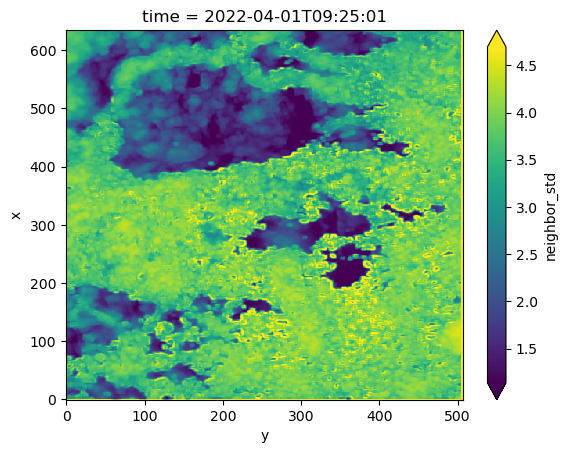

In [24]:
ds.isel(time=1).neighbor_std.plot(robust=True)